In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import division
%matplotlib inline
import matplotlib.pyplot as plt
from stockapp import models as stkmd
from dataapp import models as dtamd
from dataapp import tasks as dtatks
from stockapp import tasks as stktks
import utility as uty

from django.db import connection,connections
from django.db import reset_queries

import pandas as pd
import numpy as np

In [ ]:
from dataapp import models as dtamd
dtamd.Stockprice.objects.all()

In [2]:
dfstockmeta=pd.read_csv('databases/olddata/stockmeta.csv')
dfwatchlist=pd.read_csv('databases/olddata/watchlist.csv')
dfwatchlist_stocks=pd.read_csv('databases/olddata/watchlist_stocks.csv')

In [6]:
store=pd.HDFStore('databases/olddata/StockData.h5')
store['AAPL']

Open        High         Low       Close     Volume  \
Date                                                                    
2002-01-02   22.050001   23.299999   21.960000   23.299999  132374200   
2002-01-03   23.000001   23.750000   22.770000   23.580001  153001800   
2002-01-04   23.340000   23.950001   22.990000   23.690000  102494000   
2002-01-07   23.720001   24.000000   22.750000   22.900000  111146000   
2002-01-08   22.750000   23.050000   22.460000   22.610000  112509600   
2002-01-09   22.799999   22.930001   21.280000   21.650000   81958800   
2002-01-10   21.220000   21.460001   20.250000   21.230000  113184400   
2002-01-11   21.390001   21.839999   20.599999   21.049999   87200400   
2002-01-14   21.010000   21.400001   20.899999   21.150000  103999000   
2002-01-15   21.320001   21.760001   21.210000   21.699999   72580200   
2002-01-16   21.409999   21.409999   20.500000   20.780000  141723400   
2002-01-17   21.960000   22.740000   21.870000   22.480000  165144000   
2002-01-18   22.000000   22.600000   21.960000   22.170000   84702800   
2002-01-22   22.270001   22.370000   21.820000   21.820000   81828600   
2002-01-23   21.800000   23.040000   21.590000   23.020000  110819800   
2002-01-24   22.910000   23.510001   22.900000   23.210001   86000600   
2002-01-25   22.890000   23.420000   22.660000   23.250000   46478600   
2002-01-28   23.400000   23.550000   22.719999   23.270000   46611600   
2002-01-29   23.220001   23.540000   22.850001   23.070001   60081000   
2002-01-30   23.070001   24.140000   22.939999   24.090001  117894000   
2002-01-31   24.160001   24.730000   24.109999   24.720000  117111400   
2002-02-01   24.340000   24.960001   24.340000   24.410000   99576400   
2002-02-04   24.319999   25.520000   24.200000   25.349999  130593400   
2002-02-05   25.090000   25.980000   25.080000   25.450000  114221800   
2002-02-06   25.600000   25.980000   24.150000   24.670001  149394000   
2002-02-07   24.650000   25.290000   24.080000   24.300000   86958200   
2002-02-08   24.399999   24.640000   23.369999   24.029999   88832800   
2002-02-11   23.930000   25.000000   23.739999   24.979999   99650600   
2002-02-12   24.660000   25.040001   24.450001   24.710000   56070000   
2002-02-13   24.730000   25.240000   24.650000   25.010000   78218000   
...                ...         ...         ...         ...        ...   
2016-12-28  117.519997  118.019997  116.199997  116.760002   20582000   
2016-12-29  116.449997  117.110001  116.400002  116.730003   14963300   
2016-12-30  116.650002  117.199997  115.430000  115.820000   30253100   
2017-01-03  115.800003  116.330002  114.760002  116.150002   28509500   
2017-01-04  115.849998  116.510002  115.750000  116.019997   20858700   
2017-01-05  115.919998  116.860001  115.809998  116.610001   22103700   
2017-01-06  116.779999  118.160004  116.470001  117.910004   31577900   
2017-01-09  117.949997  119.430000  117.940002  118.989998   33387600   
2017-01-10  118.769997  119.379997  118.300003  119.110001   24420800   
2017-01-11  118.739998  119.930000  118.599998  119.750000   27418600   
2017-01-12  118.900002  119.300003  118.209999  119.250000   27002400   
2017-01-13  119.110001  119.620003  118.809998  119.040001   25938300   
2017-01-17  118.339996  120.239998  118.220001  120.000000   34078600   
2017-01-18  120.000000  120.500000  119.709999  119.989998   23644700   
2017-01-19  119.400002  120.089996  119.370003  119.779999   25295700   
2017-01-20  120.449997  120.449997  119.730003  120.000000   29479900   
2017-01-23  120.000000  120.809998  119.769997  120.080002   21131400   
2017-01-24  119.550003  120.099998  119.500000  119.970001   23150200   
2017-01-25  120.419998  122.099998  120.279999  121.879997   32377600   
2017-01-26  121.669998  122.440002  121.599998  121.940002   26282000   
2017-01-27  122.139999  122.349998  121.599998  121.949997   20437400   
2017-01-30  120.930000  121.629997  120.660004  121.629997   30278800   
201

In [8]:
for stk in dfstockmeta['Symbol']:
    print stk
    try:
        df=store[stk]
    except:
        continue
    objs=[]
    for ind in df.index:
        objs.append( dtamd.Stockprice(Close=df.loc[ind,'Close'], Open=df.loc[ind,'Open'] ,
                                     High=df.loc[ind,'High'],Low=df.loc[ind,'Low'],
                                     Volume=df.loc[ind,'Volume'],Date=ind,Symbol=stk)  )
    
    dtamd.Stockprice.objects.bulk_create(objs)
  

ARSD
CMGE
CLFD
CPL
AETI
EBF
EXG
BOTA
CCIH
ASX
ETY
FCT
CJJD
CSV
BBL
DXYN
ANW
CUK
DEO
HMST
BTI
FHCO
EOS
BITA
E
BSPM
HMC
ATAX
DSPG
FRM
CRDS
FMO
AEG
ZIGO
EFT
IFT
HPJ
KYE
LYG
INTL
MNOV
HRG
NTT
KEP
NSSC
IBN
IEP
MYI
IQI
LFC
LUX
LOJN
LRAD
LXU
IWD
MGNX
HDB
ITI
GURE
JVA
OHRP
ING
MFG
KYN
LYTS
IIIN
INFU
NYMX
IRE
MOBI
MDCI
OXBT
RAVN
PUK
PRKR
REPH
RICK
RNET
SMTX
RXDX
SNE
SRV
STS
VVI
PDFS
PCYO
UEPS
RBS
PTNR
RXII
WIRE
ULTR
PHG
UTSI
RGEN
XRM
SMFG
SIGA
NJ
FLS
ZGNX
SYUT
NEWM
SYNM
PEIX
TGE
BAGR
ASPX
CLDX
KPTI
INSY
FPRX
ASDR
GSL
TYG
STO
AMBI
FRGI
CEMP
CLDN
JJSF
TTM
ATRS
HW
CBD
ATRO
BTG
CYNO
UNIS
ITCI
CTT
CORE
APTS
CBM
CSU
FOR
COHU
STAA
HURN
HRTX
LABL
SURG
TPC
OGXI
NSTG
STAR
HIIQ
THO
SFXE
MIXT
SRDX
LSCC
MEIP
ORB
SMED
NVAX
VC
NEO
OSIS
SATS
HSBC
MOV
TEAR
EGLT
MRTX
TWER
QURE
SPA
SHOR
ERUS
WLB
USAT
XNCR
TIS
REXR
RAS
BFLY
CYBX
DORM
AWK
IPCI
CSII
EPZM
DFRG
CR
ATRC
CBK
CARA
BRP
STWD
BLUE
BBSI
ASEA
BT
BNFT
AZZ
ASGN
ANIP
CMRX
GPK
ATHX
IRT
BLDR
CNTY
CLGX
ARRY
AEGR
DARA
MGAM
DW
CLSN
CIMT
HLSS
GY
LBY
JONE
LAD
JW-A
KAR


In [9]:
ss=stkmd.Stockmeta.objects.all()
S=ss.values('Symbol','Company','Sector','Industry','Status','Labels')
S[0]

{'Company': u'Arabian American Development Company',
 'Industry': u'Chemicals - Major Diversified',
 'Labels': None,
 'Sector': u'Basic Materials',
 'Status': u'Active',
 'Symbol': u'ARSD'}

In [35]:
from django.db.models import Count,Max,Min
sp=ss.values('Date').annotate(MaxClose=Max('Close'),MinClose=Min('Close'))
print sp
print
print connections['stockpricedata'].queries
reset_queries()

<QuerySet [{'Date': datetime.date(2015, 1, 1), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 2), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 5), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 6), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 7), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 8), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 9), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 12), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 13), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00')}, {'Date': datetime.date(2015, 1, 14), 'MinClose': Decimal('0.00'), 'MaxClose': Decimal('79200.00'

In [63]:
df=pd.read_sql("""SELECT "dataapp_stockprice"."Date", 
               CAST(MIN("dataapp_stockprice"."Close") AS NUMERIC) AS "MinClose", 
               CAST(MAX("dataapp_stockprice"."Close") AS NUMERIC) AS "MaxClose", 
               CAST(AVG("dataapp_stockprice"."Close") AS NUMERIC) AS "AvgClose" 
               FROM "dataapp_stockprice" 
               WHERE "dataapp_stockprice"."Date" BETWEEN \'2015-01-01\' AND \'2016-01-01\' AND "dataapp_stockprice"."Close" >2 AND "dataapp_stockprice"."Close"<1000
               AND "dataapp_Stockprice"."id" IN (SELECT stockid FROM  )
               GROUP BY "dataapp_stockprice"."Date" 
               ORDER BY "dataapp_stockprice"."Date" ASC LIMIT 21"""
    ,connections['stockpricedata'])

In [69]:
df.index=df.Date
df

Date  MinClose  MaxClose  AvgClose
Date                                                
2015-04-27  2015-04-27     14.01     14.01     14.01
2015-04-28  2015-04-28     14.44     14.44     14.44
2015-05-13  2015-05-13     13.49     13.49     13.49
2015-05-19  2015-05-19     13.21     13.27     13.24
2015-05-20  2015-05-20     14.60     14.60     14.60
2015-05-29  2015-05-29     12.00     12.00     12.00
2015-07-31  2015-07-31     11.23     11.23     11.23
2015-09-09  2015-09-09     16.79     16.79     16.79
2015-10-21  2015-10-21     13.46     13.46     13.46
2015-11-09  2015-11-09      8.06      8.06      8.06
2015-12-04  2015-12-04      8.29      8.29      8.29
2015-12-29  2015-12-29     14.06     14.06     14.06

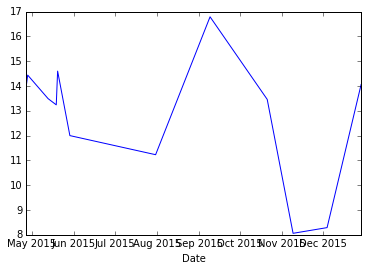

In [70]:
df['AvgClose'].plot()

In [23]:
import pymongo

from pymongo import MongoClient
client = MongoClient()

client = MongoClient('localhost', 27017)
client = MongoClient('mongodb://localhost:27017/')

In [26]:
db = client['test-database']

collection = db['test-collection']

import datetime
post = {"author": "Mike",
         "text": "My first blog post!",
         "tags": ["mongodb", "python", "pymongo"],
         "date": datetime.datetime.utcnow(),
         "somearray": {"X":[1,2,3],"Y":[4,5,6]} }

posts = db.posts
pp=db.posts.insert_one(post)
pp

In [36]:
db.collection_names(include_system_collections=True)

[u'posts', u'profiles', u'testing']

In [14]:
result = db.profiles.create_index([('user_id', pymongo.ASCENDING)],unique=True)
sorted(list(db.profiles.index_information()))


[u'_id_', u'user_id_1']

In [28]:
for pp in db.posts.find({"author": "Mike"}):
    print pp


{u'date': datetime.datetime(2017, 3, 18, 0, 9, 11, 362000), u'text': u'My first blog post!', u'_id': ObjectId('58cc7aa7c246f93c6cb16c69'), u'author': u'Mike', u'tags': [u'mongodb', u'python', u'pymongo']}
{u'date': datetime.datetime(2017, 3, 18, 0, 9, 21, 412000), u'text': u'My first blog post!', u'_id': ObjectId('58cc7ab1c246f93c6cb16c6a'), u'author': u'Mike', u'tags': [u'mongodb', u'python', u'pymongo']}
{u'date': datetime.datetime(2017, 3, 18, 0, 10, 39, 741000), u'text': u'My first blog post!', u'_id': ObjectId('58cc7affc246f93c6cb16c6b'), u'author': u'Mike', u'tags': [u'mongodb', u'python', u'pymongo']}
{u'date': datetime.datetime(2017, 3, 18, 0, 11, 8, 97000), u'text': u'My first blog post!', u'_id': ObjectId('58cc7b1cc246f93c6cb16c6c'), u'author': u'Mike', u'tags': [u'mongodb', u'python', u'pymongo']}
{u'author': u'Mike', u'text': u'My first blog post!', u'tags': [u'mongodb', u'python', u'pymongo'], u'somearray': {u'Y': [4, 5, 6], u'X': [1, 2, 3]}, u'date': datetime.datetime(201

$eq	Matches values that are equal to a specified value.
$gt	Matches values that are greater than a specified value.
$gte	Matches values that are greater than or equal to a specified value.
$lt	Matches values that are less than a specified value.
$lte	Matches values that are less than or equal to a specified value.
$ne	Matches all values that are not equal to a specified value.
$in	Matches any of the values specified in an array.
$nin	Matches none of the values specified in an array.
Logical

Name	Description
$or	Joins query clauses with a logical OR returns all documents that match the conditions of either clause.
$and	Joins query clauses with a logical AND returns all documents that match the conditions of both clauses.
$not	Inverts the effect of a query expression and returns documents that do not match the query expression.
$nor	Joins query clauses with a logical NOR returns all documents that fail to match both clauses.

Array

Name	Description
$all	Matches arrays that contain all elements specified in the query.
$elemMatch	Selects documents if element in the array field matches all the specified $elemMatch conditions.
$size	Selects documents if the array field is a specified size.

In [ ]:
IN:-->   db.inventory.find( { status: { $in: [ "A", "D" ] } } )
AND:-->  db.inventory.find( { status: "A", qty: { $lt: 30 } } )
OR:-->   db.inventory.find( { $or: [ { status: "A" }, { qty: { $lt: 30 } } ] } )
AND,OR-- db.inventory.find( {
     status: "A",
     $or: [ { qty: { $lt: 30 } }, { item: /^p/ } ]
} )    

In [39]:
import numpy as np
db.testing.update_many(
   {  },
   {
     "$set": { "Some": np.nan},
     "$currentDate": { "lastModified": True }
   }
)

In [32]:
qty="qty"
size="size"
h="h"
w="w"
uom="uom"
status="status"
db.testing.insert_one( 
   { "item": "canvas", qty: 100, size: { h: 28, w: 35.5, uom: "cm" }, status: "A" },
);

db.testing.insert_many( [
   { "item": "canvas", qty: 100, size: { h: 28, w: 35.5, uom: "cm" }, status: "A" },
   { "item": "journal", qty: 25, size: { h: 14, w: 21, uom: "cm" }, status: "A" },
   { "item": "mat", qty: 85, size: { h: 27.9, w: 35.5, uom: "cm" }, status: "A" },
   { "item": "mousepad", qty: 25, size: { h: 19, w: 22.85, uom: "cm" }, status: "P" },
   { "item": "notebook", qty: 50, size: { h: 8.5, w: 11, uom: "in" }, status: "P" },
]);

In [40]:
for pp in db.testing.find():
    print pp

{u'status': u'P', u'lastModified': datetime.datetime(2017, 3, 18, 1, 39, 44, 950000), u'Some': nan, u'qty': 100, u'item': u'canvas', u'_id': ObjectId('58cc8e51c246f93c6cb16c73'), u'size': {u'h': 28, u'w': 35.5, u'uom': u'in'}}
{u'status': u'P', u'lastModified': datetime.datetime(2017, 3, 18, 1, 39, 44, 950000), u'Some': nan, u'qty': 100, u'item': u'canvas', u'_id': ObjectId('58cc8e5bc246f93c6cb16c74'), u'size': {u'h': 28, u'w': 35.5, u'uom': u'in'}}
{u'status': u'P', u'lastModified': datetime.datetime(2017, 3, 18, 1, 39, 44, 950000), u'Some': nan, u'qty': 100, u'item': u'canvas', u'_id': ObjectId('58cc8e5bc246f93c6cb16c75'), u'size': {u'h': 28, u'w': 35.5, u'uom': u'in'}}
{u'status': u'P', u'lastModified': datetime.datetime(2017, 3, 18, 1, 39, 44, 950000), u'Some': nan, u'qty': 25, u'item': u'journal', u'_id': ObjectId('58cc8e5bc246f93c6cb16c76'), u'size': {u'h': 14, u'w': 21, u'uom': u'in'}}
{u'status': u'P', u'lastModified': datetime.datetime(2017, 3, 18, 1, 39, 44, 950000), u'Some':

In [5]:
pd.read_sql('Select * From dataapp_stockprice',connections['stockpricedata'])

DatabaseError: Execution failed on sql 'Select * From dataapp_stockprice': no such table: dataapp_stockprice

In [3]:
uty.get_celery_worker_status()

{'ERROR': 'No running Celery workers were found.'}

In [2]:
stk=stkmd.Stockmeta.objects.get(Symbol='AAPL')
dtatks.UpdatePriceData([stk.id],inputtype='id')

OperationalError: no such table: dataapp_stockprice